In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numba import jit

In [3]:
from tensorflow import keras

In [4]:
import tensorflow as tf

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
data = np.load('./../Загрузки/Sirius_data/cubes_with_missed_data/inpainting_cube_missed_data.npy')

In [134]:
data.shape

(580, 951, 462)

In [13]:
(data == 0).sum() / (data != 0).sum()

0.052558200709485386

In [20]:
data[:, :, 0].max()

0.5

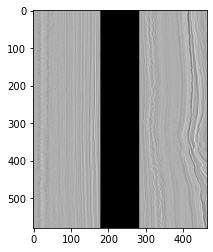

In [47]:
plt.imshow(data[:, 400, :], cmap='gray')

In [99]:
min_value = data[-1, :, :][data[-1, :, :] != 0].min()
max_value = data[-1, :, :][data[-1, :, :] != 0].max()

а данные точно нужно нормировать они уже выглядят довольно нормированными? максимум — 1.0,  минимум — 0.0059053316. 

In [104]:
data.max(), data[data != 0].min()

(1.0, 0.0059053316)

In [100]:
min_value

0.12215033

In [101]:
max_value

0.8498642

In [168]:
first_slice.shape

(951, 462)

In [180]:
x, y = np.where(first_slice == 0)

min(x), min(y)

max(x), max(y)

In [183]:
max(x) - min(x)

212

In [184]:
max(y) - min(y)

102

In [203]:
first_slice.shape

(951, 462)

In [204]:
951 - 580

371

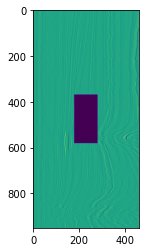

In [179]:
plt.imshow(first_slice)

In [5]:
SLICE_HEIGHT = 350
SLICE_WIDTH = 300
STRIDE_X = 30
STRIDE_Y = 30

In [9]:
from pathlib import Path

In [14]:
plt.imsave

<function matplotlib.pyplot.imsave(fname, arr, **kwargs)>

In [173]:
from skimage import img_as_ubyte

In [304]:
def save_slices_from_data(
    path_to_dataset, data
):
    path_to_dataset.mkdir(exist_ok=True)
    
    path_to_save_images = path_to_dataset / 'images'
    path_to_save_gt = path_to_dataset / 'gt'

    path_to_save_images.mkdir(exist_ok=True)
    path_to_save_gt.mkdir(exist_ok=True)
    
#    don't keep all the data in memory (~ 16 GB)
#     outpainted_slices, original_slices = [], []
    k = 0
    for ind, first_slice in enumerate(data):
        # first_slice = data[-1, :, :].copy()
        for i in range(0, data.shape[1], STRIDE_X):
            for j in range(0, data.shape[2], STRIDE_Y):
                additional_slice = first_slice[i:i+SLICE_HEIGHT, j:j+SLICE_WIDTH].copy()
                # если есть вырез не берем 
                if (additional_slice == 0).sum() != 0:
                    continue
                # если не полный кусок, то тоже не берём
                if additional_slice.shape != (SLICE_HEIGHT, SLICE_WIDTH):
                    continue
#                 additional_slice = img_as_ubyte(additional_slice)
                original_slice = additional_slice.copy()
                additional_slice[SLICE_HEIGHT//2-100:SLICE_HEIGHT//2+100, SLICE_WIDTH//2-50:SLICE_WIDTH//2+50] = 0
                
                np.save(path_to_save_images / f'{k}_{ind}.npy', additional_slice)
                np.save(path_to_save_gt / f'{k}_{ind}.npy', original_slice)
#                 print(original_slice[0, 0], additional_slice[0, 0], plt.imread(path_to_save_images / f'{k}_{ind}.jpg')[0, 0, 0], plt.imread(path_to_save_gt / f'{k}_{ind}.jpg')[0, 0, 0])
                
#                 outpainted_slices.append([additional_slice, ind])
#                 original_slices.append([original_slice, ind])
                k += 1

In [185]:
117 / 255

0.4588235294117647

In [305]:
save_slices_from_data(
    data=data,
    path_to_dataset=Path('./dataset')
)

In [306]:
img_orig.shape

(350, 300)

In [309]:
(img_blacked == 0).sum()

20000

In [313]:
print(img_blacked[15, 123], img_orig[15, 123])

0.49961853 0.49961853


0.19047619047619047


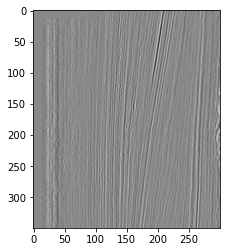

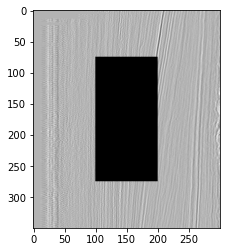

In [310]:
img_orig = np.load(Path('./dataset/gt/0_0.npy'))
img_blacked = np.load(Path('./dataset/images/0_0.npy'))

print((img_blacked == 0).sum() / (img_blacked != 1).sum())

plt.imshow(img_orig, cmap='gray')
plt.show()

plt.imshow(img_blacked, cmap='gray')
plt.show()

In [295]:
img_blacked[:, SLICE_WIDTH//2-50+37, 0]

array([119, 118, 118, 118, 119, 120, 121, 122, 122, 122, 123, 123, 124,
       124, 125, 125, 131, 130, 130, 129, 128, 127, 127, 126, 126, 125,
       124, 122, 121, 119, 118, 117, 117, 118, 119, 121, 123, 124, 125,
       126, 130, 129, 128, 127, 126, 125, 125, 124, 127, 127, 125, 124,
       122, 120, 119, 118, 117, 117, 118, 120, 122, 125, 127, 128, 123,
       124, 125, 126, 127, 128, 129, 129, 136, 138, 133,   3,  23,   3,
        15,  11,  12,  13,  14,  15,  16,  17,  17,  19,  19,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  21,  21,  22,  22,  23,  23,
        22,  22,  21,  21,  22,  22,  22,  23,  23,  23,  23,  22,  22,
        22,  22,  21,  21,  20,  20,  19,  19,  20,  20,  20,  19,  18,
        18,  18,  19,  19,  20,  20,  20,  20,  21,  21,  21,  21,  21,
        20,  19,  18,  18,  18,  17,  17,  16,  16,  17,  17,  18,  18,
        18,  18,  19,  19,  20,  20,  20,  20,  20,  19,  19,  2

In [87]:
# ! pip install scikit-image

In [6]:
from skimage.transform import resize, rotate

In [105]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, path_to_dataset, batch_size=32, 
                 shuffle=True, use_augmentations=False,
                 mode='train', val_ind=2):
        """
        mode: train or val
        """
        self.batch_size = batch_size
        self.val_ind = val_ind
        self.mode = mode
        self.initialize()
        
        self.shuffle = shuffle
        self.on_epoch_end()
        self.use_aug = use_augmentations

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Generate data
        X, Y = self.__data_generation(indexes)

        return X, Y
     
    def initialize(self):
        slice_nums = list(set(
            int(file.name.split('_')[-1].split('.')[0]) for file in (path_to_dataset / 'gt').iterdir()
        ))
        slice_nums = sorted(list(slice_nums))
        if self.mode == 'train':
            curr_slices_to_use = [slice_num for slice_num in slice_nums if slice_num % self.val_ind != 0]
        else:
            curr_slices_to_use = [slice_num for slice_num in slice_nums if slice_num % self.val_ind == 0]
        self.curr_slices_to_use = curr_slices_to_use
        
        self.X, self.Y = [], []
        for file in (path_to_dataset / 'images').iterdir():
            slice_num = int(file.name.split('_')[-1].split('.')[0])
            if slice_num in self.curr_slices_to_use:
                self.X.append(file)
                self.Y.append(path_to_dataset / 'gt' / file.name)
                   
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.X))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, indexes):
        'Generates data containing batch_size samples' 
        # Resize or padd?
        # imread (M, N, 3). can take only first dim to make them grey
        # but resnet preprocessing wants rgb images!!!
        X = [np.load(self.X[ind]) for ind in indexes]
        Y = [np.load(self.Y[ind]) for ind in indexes]
        # batch_shapes = [el.shape for el in X]
        max_w, max_h = 256, 256
        # print(max_w, max_h)
        # # Generate data
        for i, img in enumerate(X):
            w, h = X[i].shape
            if self.use_aug:
                X[i], y[i] = augment_img_mask(X[i], y[i])
                # y[i] = y[i][:, :, np.newaxis]
            # X[i] = (np.pad(X[i], pad_width=((0, max_w - w), (0, max_h - h), (0, 0)))) 
            X[i] = resize(X[i], (256, 256), preserve_range=True) 
#             X[i] = tf.keras.applications.resnet.preprocess_input(X[i]) 
            Y[i] = resize(Y[i], (256, 256), preserve_range=True) 
            # np.pad(y[i], pad_width=((0, max_w - w), (0, max_h - h), (0, 0)))
            # X[i], y[i] = np.pad()
        X, Y = np.array(X)[:, :, :, np.newaxis], np.array(Y)[:, :, :, np.newaxis]
#         X_padded = np.zeros([X.shape[0], 512, 512, 1])
#         X_padded[:, :X.shape[1], :X.shape[2], :] = X
#         Y_padded = np.zeros([Y.shape[0], 512, 512, 1])
#         Y_padded[:, :Y.shape[1], :Y.shape[2], :] = Y
        return X, Y

In [106]:
from pathlib import Path

In [107]:
path_to_dataset=Path('./dataset')

In [108]:
dg_train = DataGenerator(path_to_dataset, mode='train', val_ind=5)
dg_val = DataGenerator(path_to_dataset, mode='val', val_ind=5)

In [37]:
for x, y in dg_train:
    break

In [40]:
# plt.imshow(x[0, :, :, 0])

In [11]:
def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

def mae(img1, img2):
    return np.mean(np.abs(img1 - img2))

def cross_corr(img1, img2):
    return -(img1 * img2).sum() / np.sqrt((img1 ** 2).sum() * (img2 ** 2).sum())

In [12]:
import cv2
import skimage

In [13]:
class Inpainter:
    def __init__(self, inpaint_func):
        self.inpaint_func = inpaint_func
    
    def fit(self, X, Y):
        pass
    
    def predict(self, X):
        predictions = []
        for x in X:
            pred = self.inpaint_func(x)
            predictions.append(pred)
        return predictions

In [14]:
def inpaint_biharm(x):
    mask = np.zeros_like(x)
    mask[x == 0] = 255
    res = inpaint_biharmonic(x, mask)
    return res


def inpaint_ns(x):
    mask = np.zeros_like(x)
    mask[x == 0] = 1
    res = cv2.inpaint(x, img_as_ubyte(mask), 1, cv2.INPAINT_NS)
    return res


def inpaint_telea(x):
    mask = np.zeros_like(x)
    mask[x == 0] = 1
    res = cv2.inpaint(x, img_as_ubyte(mask), 1, cv2.INPAINT_TELEA)
    return res

def inpaint_copy_vertical(x):
    x = x.copy()
    x_, y_ = np.where(x == 0)

    for j in range(min(y_), max(y_)+1):
        for i in range(min(x_), max(x_)+1):
            x[i, j] = x[i-1, j]
    return x

In [607]:
inpainter_biharm = Inpainter(inpaint_biharm)
inpainter_ns = Inpainter(inpaint_ns)
inpainter_telea = Inpainter(inpaint_telea)
inpainter_copy_vertical = Inpainter(inpaint_copy_vertical)

In [581]:
import time

In [582]:
def check_metrics(dg, inpainter):
    start = time.time()
    metrics = []
    for x, y in dg:
        predictions = inpainter.predict(x)
        for x_image, pred, gt_img in zip(x, predictions, y):
            mse_whole = mse(pred, gt_img)
            mae_whole = mae(pred, gt_img)
            cross_corr_whole = cross_corr(pred, gt_img)

            mse_in = mse(pred[x_image == 0], gt_img[x_image == 0])
            mse_out = mse(pred[x_image != 0], gt_img[x_image != 0])

            mae_in = mae(pred[x_image == 0], gt_img[x_image == 0])
            mae_out = mae(pred[x_image != 0], gt_img[x_image != 0])

            cross_corr_in = cross_corr(pred[x_image == 0], gt_img[x_image == 0])
            cross_corr_out = cross_corr(pred[x_image != 0], gt_img[x_image != 0])

            metrics.append(
                [
                    mse_whole, mse_in, mse_out, 
                    mae_whole, mae_in, mae_out, 
                    cross_corr_whole, cross_corr_in, cross_corr_out
                ]
            )
    end = time.time()
    print(f'Took {end - start}')
    return metrics

In [583]:
metrics_ns = check_metrics(dg_val, inpainter_ns)
metrics_own = check_metrics(dg_val, inpainter_copy_verticalModelCheckpoint)
# metrics_telea = check_metrics(dg_val, inpainter_telea)
# metrics_biharm = check_metrics(dg_val, inpainter_biharm)

Took 7.358378648757935
Took 361.8584017753601


In [558]:
import pandas as pd

In [584]:
type2metrics = dict()
for metrics_name, metrics in [('ns', metrics_ns), ('copy_vertical', inpainter_copy_vertical)]:
    df_metrics = pd.DataFrame(metrics, columns=['mse_whole', 'mse_in', 'mse_out', 
                'mae_whole', 'mae_in', 'mae_out', 
                'cross_corr_whole', 'cross_corr_in', 'cross_corr_out'])
    agg_stats = df_metrics.mean()
    type2metrics[metrics_name] = agg_stats

In [585]:
df_final_results = pd.DataFrame(type2metrics)

In [586]:
df_final_results

,ns,own
mse_whole,0.000524,0.000531
mse_in,0.002750,0.002785
mse_out,0.000000,0.000000
mae_whole,0.007421,0.007550
mae_in,0.038961,0.039636
mae_out,0.000000,0.000000
cross_corr_whole,-0.998964,-0.998945
cross_corr_in,-0.994698,-0.994465
cross_corr_out,-1.000000,-1.000000


In [559]:
type2metrics = dict()
for metrics_name, metrics in [('ns', metrics_ns), ('telea', metrics_telea), ('biharm', metrics_biharm)]:
    df_metrics = pd.DataFrame(metrics, columns=['mse_whole', 'mse_in', 'mse_out', 
                'mae_whole', 'mae_in', 'mae_out', 
                'cross_corr_whole', 'cross_corr_in', 'cross_corr_out'])
    agg_stats = df_metrics.mean()
    type2metrics[metrics_name] = agg_stats

In [560]:
df_final_results = pd.DataFrame(type2metrics)

In [561]:
df_final_results

,ns,telea,biharm
mse_whole,0.000524,30.731675,0.003069
mse_in,0.002750,161.341293,0.016113
mse_out,0.000000,0.000000,0.000000
mae_whole,0.007421,2.029923,0.018436
mae_in,0.038961,10.657097,0.096788
mae_out,0.000000,0.000000,0.000000
cross_corr_whole,-0.998964,-0.438990,-0.994369
cross_corr_in,-0.994698,-0.846435,-0.977497
cross_corr_out,-1.000000,-1.000000,-1.000000


In [569]:
x_, y_ = np.where(x == 0)
min(x_), min(y_), max(x_), max(y_)

for j in range(min(y_), max(y_)+1):
    for i in range(min(x_), max(x_)+1):
        x[i, j] = x[i-1, j]

(75, 100, 274, 199)

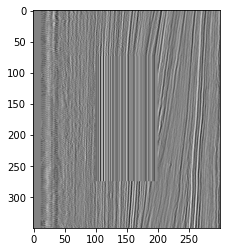

In [578]:
plt.imshow(x, cmap='gray')

In [ ]:
def our_inpaint(x):

In [563]:
x.shape

(350, 300)

In [ ]:
np.where

In [598]:
for ind in range(2):
    for x, y in dg_val:
        continue
    dg_val.on_epoch_end()
    print(x[10, 54, 23])

0.4932249
0.47177038


In [601]:
mask = x == 0Epoch 1/2
1392/1392 [==============================] - 148s 89ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.1112 - val_mse: 0.1112

Epoch 00001: val_loss improved from inf to 0.11122, saving model to ./best_weights.h5

In [602]:
pred_telea[mask] /= pred_telea[mask].max()

In [604]:
pred_telea[~mask] /= pred_telea[~mask].max()

Telea


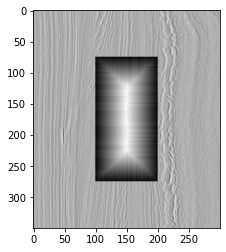

In [605]:
print('Telea')
plt.imshow(pred_telea, cmap='gray')
plt.show()

BiHarm


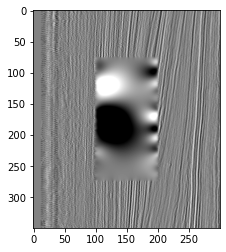

NS


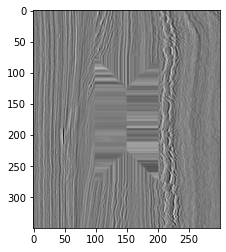

Telea


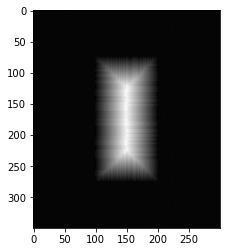

Simple(Copy Vertical)


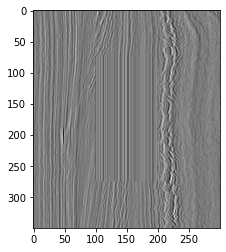

In [655]:
for x_, y in dg_val:
    x = x_[15]
#     pred_bi = inpaint_biharm(x)
    pred_ns = inpaint_ns(x)
    pred_telea = inpaint_telea(x)
    pred_simple = inpaint_copy_vertical(x)
    
    print('BiHarm')
    plt.imshow(pred_bi, cmap='gray')
    plt.show()
    
    print('NS')
    plt.imshow(pred_ns, cmap='gray')
    plt.show()
    
    print('Telea')
    plt.imshow(pred_telea, cmap='gray')
    plt.show()
    
    print('Simple(Copy Vertical)')
    plt.imshow(pred_simple, cmap='gray')
    plt.show()
    
    break

In [610]:
from skimage.transform import hough_line

In [635]:
tested_angles

array([-1.57079633,  0.        ])

In [636]:
theta.shape

(2,)

In [637]:
theta

array([-1.57079633,  0.        ])

In [638]:
from skimage.transform import hough_line_peaks

In [648]:
from skimage.filters import sobel
from skimage.feature import canny

214 0.0
198 0.0
195 0.0
192 0.0
184 0.0
179 0.0
163 0.0
143 0.0
127 -1.5707963267948966
111 0.0


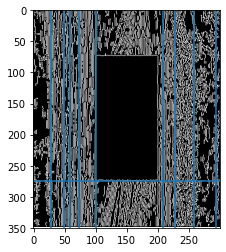

In [666]:
image = canny(x_[26], sigma=0.3)

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 2, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

fig, ax = plt.subplots(1, 1)
# plt.get_
ax.imshow(image, cmap='gray')
ax.set_ylim((image.shape[0], 0))
# plt.set_axis_off()
# plt.set_title('Detected lines')

for accum, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    print(accum, angle)
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2))

In [667]:
for x, y in dg_val:
    break

In [668]:
x.shape

(32, 350, 300)

In [673]:
x_padded.shape

(3,)

In [181]:
from tensorflow.keras.applications import ResNet50V2, ResNet50
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, BatchNormalization, Conv2D, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l2

keras.backend.clear_session()


inputs = Input((256, 256, 1))
x = inputs
# s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (x)
# c1 = Dropout(0.1) (c1)
c1 = BatchNormalization()(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
# c2 = Dropout(0.1) (c2)
c2 = BatchNormalization()(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
# c3 = Dropout(0.2) (c3)
c3 = BatchNormalization()(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

# c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
# c4 = Dropout(0.2) (c4)
# c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
# p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
p4 = p3

c5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
# c5 = Dropout(0.3) (c5)
c5 = BatchNormalization()(c5)
c5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)

# u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
# u6 = concatenate([u6, c4])
# c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
# c6 = Dropout(0.2) (c6)
# c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same') (c5)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (4, 4), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='linear', dtype='float32') (c9)

model = keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='mse', metrics='mse')

In [182]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        batch_normalization[0][0]        
______________________________________________________________________________________________

In [183]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [184]:
dg_train = DataGenerator(path_to_dataset, mode='train', batch_size=4, val_ind=5)
dg_val = DataGenerator(path_to_dataset, mode='val', batch_size=4, val_ind=5)

In [185]:
import tensorflow as tf

In [186]:
tf.keras.mixed_precision.experimental.set_policy('mixed_float16')

In [187]:
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir="model1",
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq=1,
    profile_batch=2,
    embeddings_freq=0,
)

In [188]:
model_check = ModelCheckpoint('./best_weights_1.h5', save_best_only=True, verbose=1)

# dg_wo_augs = DataGenerator(X_train, y_train, batch_size=16, use_augmentations=False)
model.fit(
    dg_train, 
    epochs=20,
    validation_data=dg_val,
    callbacks=[model_check, tb_callback], initial_epoch=0, # workers=6, max_queue_size=20
) 

Epoch 1/20
1392/1392 [==============================] - 41s 26ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 3.0024e-04 - val_mse: 3.0024e-04

Epoch 00001: val_loss improved from inf to 0.00030, saving model to ./best_weights_1.h5
Epoch 2/20
1392/1392 [==============================] - 37s 27ms/step - loss: 3.0070e-04 - mse: 3.0070e-04 - val_loss: 2.3968e-04 - val_mse: 2.3968e-04

Epoch 00002: val_loss improved from 0.00030 to 0.00024, saving model to ./best_weights_1.h5
Epoch 3/20
1392/1392 [==============================] - 37s 26ms/step - loss: 2.4465e-04 - mse: 2.4465e-04 - val_loss: 2.1301e-04 - val_mse: 2.1301e-04

Epoch 00003: val_loss improved from 0.00024 to 0.00021, saving model to ./best_weights_1.h5
Epoch 4/20
1392/1392 [==============================] - 37s 27ms/step - loss: 2.1186e-04 - mse: 2.1186e-04 - val_loss: 1.8674e-04 - val_mse: 1.8674e-04

Epoch 00004: val_loss improved from 0.00021 to 0.00019, saving model to ./best_weights_1.h5
Epoch 5/20
1392/1392 [==========

KeyboardInterrupt: 

In [198]:
c

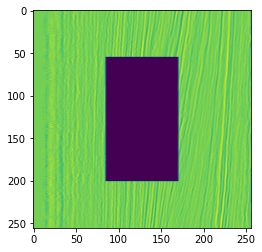

In [199]:
plt.imshow(x[0, :, :, 0])

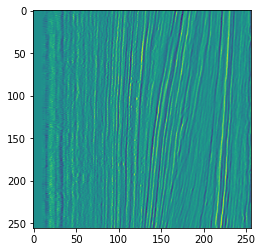

In [200]:
plt.imshow(y[0, :, :, 0])

In [201]:
x.shape

(4, 256, 256, 1)

In [228]:
for ind, (x, y) in enumerate(dg_val):
    if ind == 2:
        break

In [229]:
best_model = tf.keras.models.load_model('./best_weights_1.h5')

In [230]:
prediction = best_model.predict(x)

In [219]:
prediction.shape

(4, 256, 256, 1)

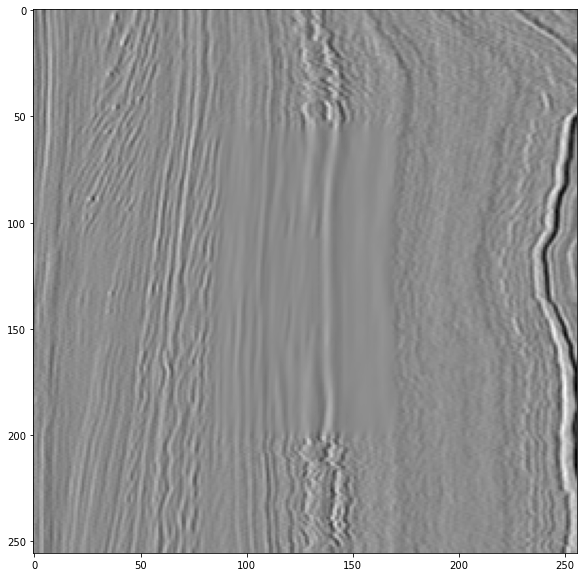

In [237]:
plt.figure(figsize=(10, 10))
plt.imshow(prediction[3, :, :, 0], cmap='gray')

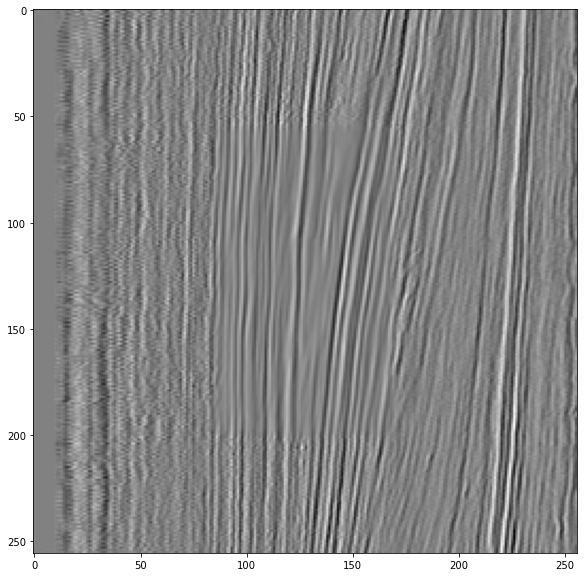

In [205]:
plt.figure(figsize=(10, 10))
plt.imshow(prediction[0, :, :, 0], cmap='gray')

In [175]:
prediction.max()

0.0

In [98]:
prediction.min()

0.0

In [102]:
mse(prediction, y)

3.8637327e-06

In [103]:
prediction

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [104]:
y.max()

0.0036230264